# <font color = 'orange'> 03-data_anaylsis issue </font>
### Working on <font color='green'> 03-data_analysis </font> branch

#### Importing libraries and creating the pd dataframes

In [1]:
import pandas as pd, sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
conn = sqlite3.connect(r"/workspaces/weather-scraper-analyzer/data/weather_data.db")

hourly_df = pd.read_sql(r"SELECT * FROM hourly_data", conn)
daily_df = pd.read_sql(r"SELECT * FROM daily_data", conn)

# Convert 'date' columns to datetime | This is because SQLite doesn't have a datetime datatype so it stores the data as object. So we have to convert it here for further use even
# even if in the fetch script we converted it to date

hourly_df['date'] = pd.to_datetime(hourly_df['date'])
daily_df['date'] = pd.to_datetime(daily_df['date']) 

In [3]:
print(hourly_df.dtypes)
print(daily_df.dtypes)
print(hourly_df['date'].dtype)
print(daily_df['date'].dtype)



index                                    int64
date                            datetime64[ns]
temperature_2m_C                       float64
relative_humidity_2m_percent           float64
precipitation_mm                       float64
weather_code                           float64
wind_speed_10m_kmh                     float64
wind_direction_10m_deg                 float64
wind_gusts_10m_kmh                     float64
dtype: object
index                                       int64
date                               datetime64[ns]
weather_code                              float64
temperature_2m_max_C                      float64
temperature_2m_min_C                      float64
temperature_2m_mean_C                     float64
precipitation_sum_mm                      float64
wind_speed_10m_max_kmh                    float64
wind_gusts_10m_max_kmh                    float64
wind_direction_10m_dominant_deg           float64
dtype: object
datetime64[ns]
datetime64[ns]


In [4]:
daily_df.shape

(9066, 10)

In [5]:
hourly_df.shape

(217585, 9)

In [6]:
hourly_df.head()

,index,date,temperature_2m_C,relative_humidity_2m_percent,precipitation_mm,weather_code,wind_speed_10m_kmh,wind_direction_10m_deg,wind_gusts_10m_kmh
0,0,2000-01-01 00:00:00,-1.978,87.486717,0.0,3.0,12.849528,348.690094,23.400000
1,1,2000-01-01 01:00:00,-2.128,86.170082,0.0,3.0,12.758432,343.610382,24.840000
2,2,2000-01-01 02:00:00,-2.478,86.132591,0.0,3.0,13.441071,339.623474,25.559999
3,3,2000-01-01 03:00:00,-2.678,85.142136,0.0,3.0,14.003029,342.030762,26.639999
4,4,2000-01-01 04:00:00,-2.978,85.430328,0.0,3.0,13.896187,343.442841,27.359999


In [7]:
hourly_df.drop(columns=['index']).describe()

,date,temperature_2m_C,relative_humidity_2m_percent,precipitation_mm,weather_code,wind_speed_10m_kmh,wind_direction_10m_deg,wind_gusts_10m_kmh
count,217585,217585.000000,217585.000000,217585.000000,217585.000000,217585.000000,217585.000000,217585.000000
mean,2012-05-30 00:00:00,12.539259,71.553561,0.077650,8.599899,8.882261,188.733880,18.759481
min,2000-01-01 00:00:00,-23.377998,14.915503,0.000000,0.000000,0.000000,0.658531,1.080000
25%,2006-03-16 12:00:00,5.022000,58.301064,0.000000,0.000000,5.771239,105.945465,11.879999
50%,2012-05-30 00:00:00,12.622000,74.064232,0.000000,1.000000,7.895416,178.667816,16.199999
75%,2018-08-13 12:00:00,19.802500,87.161629,0.000000,3.000000,11.183201,288.034363,23.759998
max,2024-10-27 00:00:00,39.872002,100.000000,13.300000,75.000000,39.831684,360.000000,91.439995
std,NaN,9.545554,18.169802,0.338805,18.999534,4.721883,105.351222,9.380613


In [8]:
daily_df.drop(columns=['index']).describe()

,date,weather_code,temperature_2m_max_C,temperature_2m_min_C,temperature_2m_mean_C,precipitation_sum_mm,wind_speed_10m_max_kmh,wind_gusts_10m_max_kmh,wind_direction_10m_dominant_deg
count,9066,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000
mean,2012-05-29 12:00:00,28.898853,17.276204,7.786020,12.539280,1.863611,13.698358,28.649821,188.287191
min,2000-01-01 00:00:00,0.000000,-11.378000,-23.377998,-16.140501,0.000000,3.706427,8.280000,0.000005
25%,2006-03-16 06:00:00,2.000000,9.622000,1.352500,5.420730,0.000000,9.585739,20.519999,109.714670
50%,2012-05-29 12:00:00,3.000000,17.852501,8.122000,12.915376,0.000000,12.641076,27.000000,177.361137
75%,2018-08-12 18:00:00,53.000000,25.272001,14.672000,19.992834,1.700000,16.750641,34.919998,288.730995
max,2024-10-26 00:00:00,75.000000,39.872002,25.722000,31.985832,42.400002,39.831684,91.439995,359.999969
std,NaN,28.186962,9.713563,8.105112,8.915789,4.108096,5.312853,10.467305,106.475853


#### Data preprocessing stage...

Let's detect outliers now (still part of the preprocessing stage) using 3 methods: 


- **1. Interquartile Range (IQR)**
- **2. Z-Score**
- **3. Modified Z-score (Median Absolute Deviation)**



In [9]:
from scipy import stats


# hourly data
# 1. IQR

hourly_df_outliers = hourly_df.drop(columns=['index', 'weather_code'])
print("hourly data:")
for column in hourly_df_outliers.select_dtypes(include=['float', 'int']).columns:
    Q1 = hourly_df[column].quantile(0.25)
    Q3 = hourly_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = hourly_df[(hourly_df[column] < (Q1 - 1.5 * IQR)) | (hourly_df[column] > (Q3 + 1.5 * IQR))]
    print(f"IQR METHOD: Outliers detected in {column}: {len(outliers)} - {int((len(outliers)/hourly_df.shape[0]*100))}%")
    
print(" ")

# 2. Z-score
threshold = 3
for column in hourly_df_outliers.select_dtypes(include=['float', 'int']).columns:
    z_scores = stats.zscore(hourly_df_outliers[column])
    outliers = hourly_df_outliers[(z_scores > threshold) | (z_scores < -threshold)]
    print(f"Z-score method: Outliers detected in {column}: {len(outliers)} - {int((len(outliers)/hourly_df_outliers.shape[0]*100))}%")

print(" ")

# 3. Modified Z-score
def modified_z_score(series):
    median = series.median()
    mad = (series - median).abs().median()
    return 0.6745 * (series - median) / mad

threshold = 3.5
for column in hourly_df_outliers.select_dtypes(include=['float', 'int']).columns:
    mz_scores = modified_z_score(hourly_df_outliers[column])
    outliers = hourly_df_outliers[mz_scores.abs() > threshold]
    print(f"Modified Z-score method: Outliers detected in {column}: {len(outliers)} - {int((len(outliers)/hourly_df_outliers.shape[0]*100))}%")
print(" \n  ")

# daily data
# 1. IQR
daily_df_outliers = daily_df.drop(columns=['index', 'weather_code'])
print("daily data:")

for column in daily_df_outliers.select_dtypes(include=['float', 'int']).columns:
    Q1 = daily_df[column].quantile(0.25)
    Q3 = daily_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = daily_df[(daily_df[column] < (Q1 - 1.5 * IQR)) | (daily_df[column] > (Q3 + 1.5 * IQR))]
    print(f"IQR METHOD: Outliers detected in {column}: {len(outliers)} - {int((len(outliers)/daily_df_outliers.shape[0]*100))}%")

print(" ")
   
# 2. Z-score
threshold = 3

for column in daily_df_outliers.select_dtypes(include=['float', 'int']).columns:
    z_scores = stats.zscore(daily_df_outliers[column])
    outliers = daily_df_outliers[(z_scores > threshold) | (z_scores < -threshold)]
    print(f"Z-score method: Outliers detected in {column}: {len(outliers)} - {int((len(outliers)/daily_df_outliers.shape[0]*100))}%")

print(" ")
# 3. Modified Z-score
threshold = 3.5

for column in daily_df_outliers.select_dtypes(include=['float', 'int']).columns:
    mz_scores = modified_z_score(daily_df_outliers[column])
    outliers = daily_df_outliers[mz_scores.abs() > threshold]
    print(f"Modified Z-score method: Outliers detected in {column}: {len(outliers)} - {int((len(outliers)/daily_df_outliers.shape[0]*100))}%")


hourly data:
IQR METHOD: Outliers detected in temperature_2m_C: 94 - 0%
IQR METHOD: Outliers detected in relative_humidity_2m_percent: 1 - 0%
IQR METHOD: Outliers detected in precipitation_mm: 29609 - 13%
IQR METHOD: Outliers detected in wind_speed_10m_kmh: 8151 - 3%
IQR METHOD: Outliers detected in wind_direction_10m_deg: 0 - 0%
IQR METHOD: Outliers detected in wind_gusts_10m_kmh: 5801 - 2%
 
Z-score method: Outliers detected in temperature_2m_C: 135 - 0%
Z-score method: Outliers detected in relative_humidity_2m_percent: 17 - 0%
Z-score method: Outliers detected in precipitation_mm: 4206 - 1%
Z-score method: Outliers detected in wind_speed_10m_kmh: 2719 - 1%
Z-score method: Outliers detected in wind_direction_10m_deg: 0 - 0%
Z-score method: Outliers detected in wind_gusts_10m_kmh: 2343 - 1%
 
Modified Z-score method: Outliers detected in temperature_2m_C: 0 - 0%
Modified Z-score method: Outliers detected in relative_humidity_2m_percent: 0 - 0%
Modified Z-score method: Outliers detecte

In [10]:
hourly_df[hourly_df['weather_code'] == 65].drop(columns=['index']) # finding out all the cases with heavy rainfall 
# we see the heaviest rain in 2009 row 82777

,date,temperature_2m_C,relative_humidity_2m_percent,precipitation_mm,weather_code,wind_speed_10m_kmh,wind_direction_10m_deg,wind_gusts_10m_kmh
22263,2002-07-16 15:00:00,26.522001,73.605751,8.8,65.0,9.000000,106.260277,24.480000
40677,2004-08-21 21:00:00,21.522001,87.576431,11.3,65.0,16.055355,312.273621,32.760002
40793,2004-08-26 17:00:00,20.372002,88.578377,12.1,65.0,9.178235,221.820084,41.039997
48405,2005-07-09 21:00:00,18.172001,98.132111,8.6,65.0,6.696387,216.253922,19.080000
49009,2005-08-04 01:00:00,21.672001,96.686943,11.2,65.0,8.121970,192.804260,27.719999
56945,2006-06-30 17:00:00,22.772001,91.540390,8.5,65.0,5.588703,345.068542,34.919998
64385,2007-05-06 17:00:00,17.372002,94.454987,7.9,65.0,6.130579,229.763718,39.599998
67863,2007-09-28 15:00:00,19.372002,87.938843,8.1,65.0,11.792404,282.339081,35.279999
82774,2009-06-10 22:00:00,19.322001,87.380196,13.3,65.0,20.523157,322.124939,45.719997
92896,2010-08-06 16:00:00,22.672001,88.219376,7.7,65.0,6.287130,66.370613,39.239998


In [11]:
# let's see what happened on row 82777 - 2009-06-10 in this day
hourly_df[hourly_df['date'].dt.strftime('%Y-%m-%d') == '2009-06-10'].drop(columns=['index'])

,date,temperature_2m_C,relative_humidity_2m_percent,precipitation_mm,weather_code,wind_speed_10m_kmh,wind_direction_10m_deg,wind_gusts_10m_kmh
82752,2009-06-10 00:00:00,19.872002,84.713554,0.0,0.0,7.200000,143.130020,11.520000
82753,2009-06-10 01:00:00,19.322001,86.828926,0.0,0.0,7.200000,143.130020,11.520000
82754,2009-06-10 02:00:00,18.772001,88.166145,0.0,0.0,6.915374,141.340164,11.520000
82755,2009-06-10 03:00:00,20.672001,77.373276,0.0,0.0,6.287130,156.370605,11.159999
82756,2009-06-10 04:00:00,19.372002,86.285606,0.6,53.0,5.315336,241.699341,18.359999
82757,2009-06-10 05:00:00,20.722000,81.660072,0.1,51.0,8.557102,284.620911,23.759998
82758,2009-06-10 06:00:00,22.372002,71.520454,0.0,0.0,6.792466,302.005341,18.000000
82759,2009-06-10 07:00:00,23.672001,65.484131,0.9,53.0,5.860375,312.510406,22.680000
82760,2009-06-10 08:00:00,24.422001,60.835701,0.5,53.0,5.991594,302.735199,23.039999
82761,2009-06-10 09:00:00,25.872002,55.096050,0.0,0.0,9.107359,288.435028,19.440001


In [12]:
hourly_df['date'].head()
daily_df['date'].head()

0   2000-01-01
1   2000-01-02
2   2000-01-03
3   2000-01-04
4   2000-01-05
Name: date, dtype: datetime64[ns]

In [13]:
# finding out how many values precipitation has, the min/max values + the values between them

max_prep = len(hourly_df[hourly_df['precipitation_mm']==hourly_df['precipitation_mm'].max()])
min_prep = len(hourly_df[hourly_df['precipitation_mm']==hourly_df['precipitation_mm'].min()])

print(max_prep)
print(min_prep) 
print(len(hourly_df[(hourly_df['precipitation_mm'] >= max_prep) & (hourly_df['precipitation_mm'] <= min_prep)]))

1
187976
4878


**Task 1:  Calculate Statistical Metrics:** 
- Compute average, maximum, and minimum values for temperature, precipitation, and wind speed across different time frames (monthly, yearly, seasonally).
 - Identify periods of high variability (standard deviation) and identify trends like warming or cooling over the years.

In [14]:
print(hourly_df['date'].dtypes, daily_df['date'].dtypes)

datetime64[ns] datetime64[ns]


In [15]:
daily_df.drop(columns='index', inplace=True)
hourly_df.drop(columns='index', inplace=True)


*Setting up date frames weekly, monthly, seasonally and yearly*

In [16]:
# Set the date as the index for easier resampling

hourly_df = hourly_df.set_index('date')
daily_df = daily_df.set_index('date')
# test_hourly_df.head()
# # test_daily_df.head()

In [33]:
daily_df.columns

Index(['weather_code', 'temperature_2m_max_C', 'temperature_2m_min_C',
       'temperature_2m_mean_C', 'precipitation_sum_mm',
       'wind_speed_10m_max_kmh', 'wind_gusts_10m_max_kmh',
       'wind_direction_10m_dominant_deg'],
      dtype='object')

In [37]:
# For hourly data
hourly_metrics = {
    'temperature_2m_C': ['mean', 'max', 'min', 'std'],
    'relative_humidity_2m_percent': ['mean', 'max', 'min', 'std'],
    'precipitation_mm': ['mean', 'max', 'min', 'std'],
    'wind_speed_10m_kmh': ['mean', 'max', 'min', 'std'],
    'wind_direction_10m_deg': ['mean', 'max', 'min', 'std'],
    'wind_gusts_10m_kmh': ['mean', 'max', 'min', 'std']

}

# Weekly aggregation
weekly_hourly = hourly_df.resample('W').agg(hourly_metrics)
weekly_hourly
# Monthly aggregation
monthly_hourly = hourly_df.resample('ME').agg(hourly_metrics)

# Seasonal (quarterly) aggregation
seasonal_hourly = hourly_df.resample('QE').agg(hourly_metrics)

# Yearly aggregation
yearly_hourly = hourly_df.resample('YE').agg(hourly_metrics)

# For daily data (apply similar metrics)
daily_metrics = {
    'temperature_2m_max_C': ['mean', 'max', 'min', 'std'],
    'temperature_2m_min_C': ['mean', 'max', 'min', 'std'],
    'temperature_2m_mean_C':['mean', 'max', 'min', 'std'],
    'precipitation_sum_mm': ['mean', 'max', 'min', 'std'],
    'wind_speed_10m_max_kmh': ['mean', 'max', 'min', 'std'],
    'wind_gusts_10m_max_kmh': ['mean', 'max', 'min', 'std'],
    'wind_direction_10m_dominant_deg': ['mean', 'max', 'min', 'std']
}

# Weekly aggregation
weekly_daily = daily_df.resample('W').agg(daily_metrics)

# Monthly aggregation
monthly_daily = daily_df.resample('ME').agg(daily_metrics)

# Seasonal (quarterly) aggregation
seasonal_daily = daily_df.resample('QE').agg(daily_metrics)

# Yearly aggregation
yearly_daily = daily_df.resample('YE').agg(daily_metrics)

*hourly stats*

In [ ]:
# Weekly stats summary
print("Weekly Hourly Summary:")
print(weekly_hourly.describe())

# Monthly stats summary
print("Monthly Hourly Summary:")
print(monthly_hourly.describe())

# Seasonal stats summary
print("Seasonal Hourly Summary:")
print(seasonal_hourly.describe())

# Yearly stats summary
print("Yearly Hourly Summary:")
print(yearly_hourly.describe())

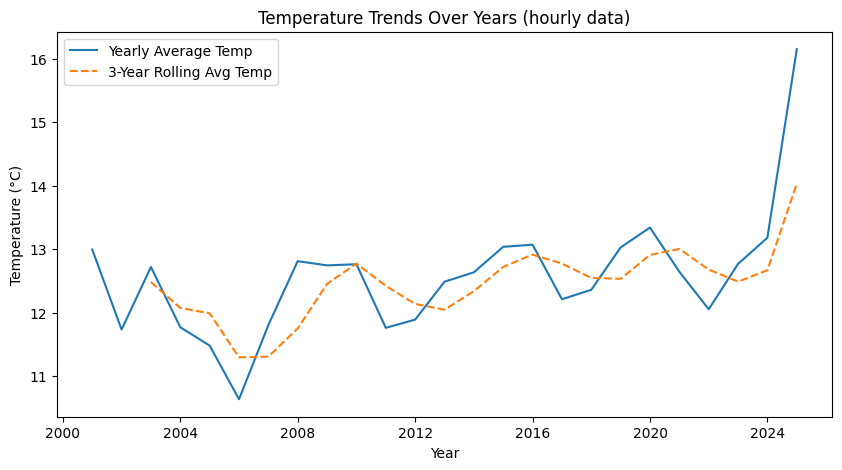

In [50]:
# Rolling average for temperature to observe trend
yearly_hourly['temperature_2m_C_rolling_mean'] = yearly_hourly['temperature_2m_C']['mean'].rolling(window=3).mean()

# Plotting trends
plt.figure(figsize=(10, 5))
plt.plot(yearly_hourly.index, yearly_hourly['temperature_2m_C']['mean'], label='Yearly Average Temp')
plt.plot(yearly_hourly.index, yearly_hourly['temperature_2m_C_rolling_mean'], label='3-Year Rolling Avg Temp', linestyle='--')
plt.title('Temperature Trends Over Years (hourly data)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Seasons with high temperature variability:
91


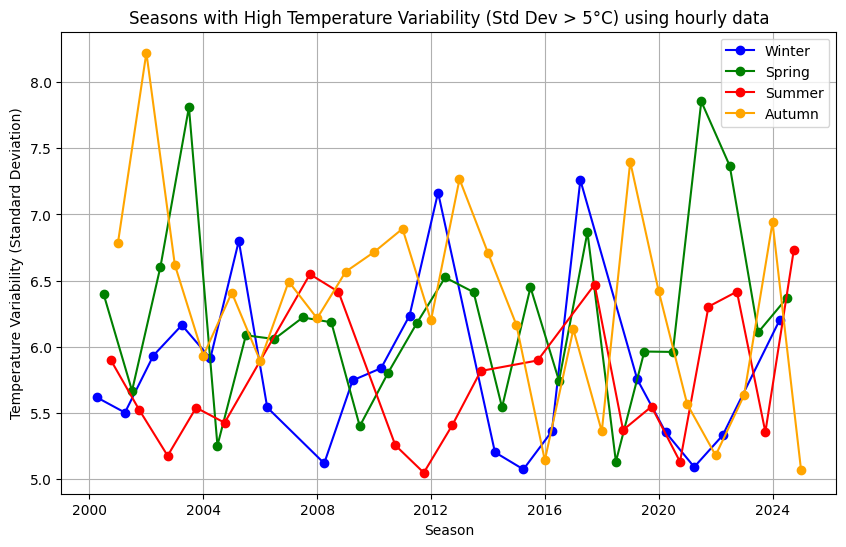

In [60]:
# Map quarters to seasons
def map_season(quarter):
    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    elif quarter == 4:
        return 'Autumn'

# Apply the function to assign seasons
seasonal_hourly['season'] = seasonal_hourly.index.quarter.map(map_season)

# Filter for high variability in temperature across seasons
high_variability_seasonal = seasonal_hourly[seasonal_hourly['temperature_2m_C']['std'] > 5]
print("Seasons with high temperature variability:")
print(len(high_variability_seasonal))




# Plot with colors representing each season
plt.figure(figsize=(10, 6))
for season, color in zip(['Winter', 'Spring', 'Summer', 'Autumn'], ['blue', 'green', 'red', 'orange']):
    subset = high_variability_seasonal[high_variability_seasonal['season'] == season]
    plt.plot(subset.index, subset['temperature_2m_C']['std'], marker='o', linestyle='-', label=season, color=color)

plt.title('Seasons with High Temperature Variability (Std Dev > 5°C) using hourly data')
plt.xlabel('Season')
plt.ylabel('Temperature Variability (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()

*daily stats*

In [42]:
# Weekly stats summary
print("Weekly Daily Summary:")
print(weekly_daily.describe())

# Monthly stats summary
print("Monthly Daily Summary:")
print(monthly_daily.describe())

# Seasonal stats summary
print("Seasonal Daily Summary:")
print(seasonal_daily.describe())

# Yearly stats summary
print("Yearly Daily Summary:")
print(yearly_daily.describe())


Weekly Daily Summary:
      temperature_2m_max_C                                         \
                      mean          max          min          std   
count          1296.000000  1296.000000  1296.000000  1296.000000   
mean             17.267552    21.059573    13.437721     2.802270   
std               9.301250     9.297607     9.342587     1.205706   
min              -7.999429    -5.628000   -11.378000     0.318198   
25%               9.555928    13.944875     5.667125     1.916742   
50%              17.951536    21.452499    13.872000     2.614269   
75%              25.308197    28.807375    21.407375     3.550016   
max              37.288215    39.872002    35.702499     7.749770   

      temperature_2m_min_C                                         \
                      mean          max          min          std   
count          1296.000000  1296.000000  1296.000000  1296.000000   
mean              7.779182    10.964742     4.778770     2.256471   
std        

In [43]:
yearly_daily.head()

temperature_2m_max_C                                \
                           mean        max     min        std   
date                                                            
2000-12-31            17.984296  38.322002  -5.728   9.833682   
2001-12-31            16.189946  35.572002  -4.728   9.392022   
2002-12-31            17.312685  35.271999  -6.128   9.241205   
2003-12-31            16.577480  35.872002 -11.378  11.087857   
2004-12-31            15.790170  35.972000  -4.428   9.396041   

           temperature_2m_min_C                                  \
                           mean        max        min       std   
date                                                              
2000-12-31             7.858749  25.722000 -19.927999  8.203753   
2001-12-31             7.252685  23.272001 -13.778000  7.897374   
2002-12-31             8.086384  22.922001 -11.478000  7.977318   
2003-12-31             6.774740  23.972000 -23.377998  9.589031   
2004-12-31             7.090853  23.972000 -15.828000  7.714467   

           temperature_2m_mean_C             ... wind_speed_10m_max_kmh  \
                            mean        max  ...                    min   
date                                         ...                          
2000-12-31             12.996106  31.680334  ...               5.506941   
2001-12-31             11.736190  28.969915  ...               5.241679   
2002-12-31             12.721738  29.151167  ...               4.213692   
2003-12-31             11.772953  29.459503  ...               5.241679   
2004-12-31             11.483305  28.976168  ...               5.241679   

                     wind_gusts_10m_max_kmh                                   \
                 std                   mean        max        min        std   
date                                                                           
2000-12-31  5.510707              29.355737  69.120003  10.440001  11.267369   
2001-12-31  5.261465              29.072218  64.799995  11.159999  10.772756   
2002-12-31  5.124385              28.423232  64.439995   9.360000  10.404509   
2003-12-31  4.914578              27.858081  63.000000  11.159999  10.224286   
2004-12-31  4.954375              28.798032  72.720001  11.159999  10.146846   

           wind_direction_10m_dominant_deg                                    
                                      mean         max       min         std  
date                                                                          
2000-12-31                      194.715731  359.999969  0.115517   98.227369  
2001-12-31                      199.103806  359.262329  0.210265  106.431257  
2002-12-31                      180.808303  358.729553  0.587169  102.459369  
2003-12-31                      185.080415  359.309723  0.000060  113.529002  
2004-12-31                      206.180843  359.999969  0.561747  104.808498  

[5 rows x 28 columns]

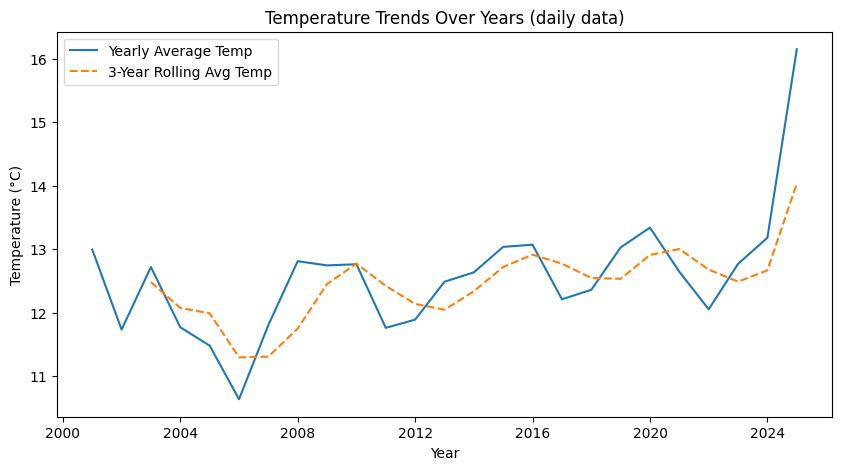

In [49]:
# Rolling average for temperature to observe trend
yearly_daily['temperature_2m_C_rolling_mean'] = yearly_daily['temperature_2m_mean_C']['mean'].rolling(window=3).mean()

# Plotting trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly_daily.index, yearly_daily['temperature_2m_mean_C']['mean'], label='Yearly Average Temp')
plt.plot(yearly_daily.index, yearly_daily['temperature_2m_C_rolling_mean'], label='3-Year Rolling Avg Temp', linestyle='--')
plt.title('Temperature Trends Over Years (daily data)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Seasons with high temperature variability:
42


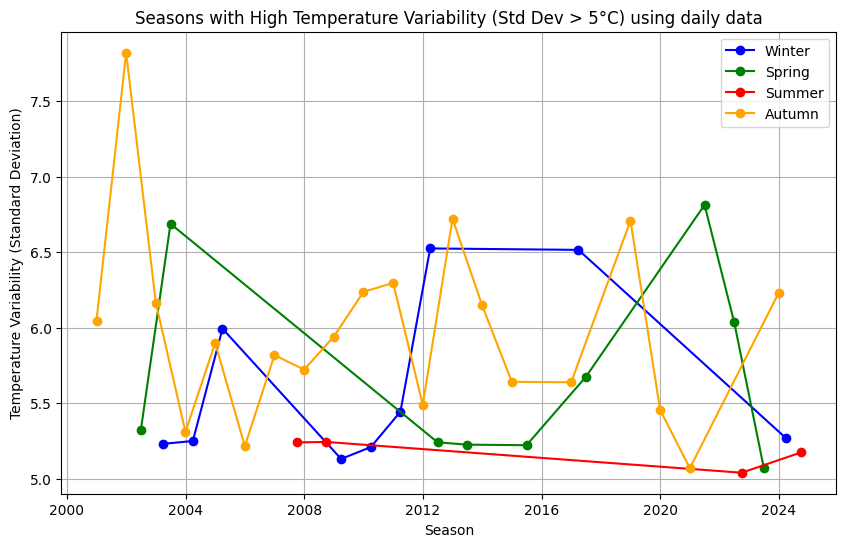

In [157]:
# Apply the function to assign seasons
seasonal_daily['season'] = seasonal_daily.index.quarter.map(map_season)

# Filter for high variability in temperature across seasons
high_variability_seasonal = seasonal_daily[seasonal_daily['temperature_2m_mean_C']['std'] > 5]
print("Seasons with high temperature variability:")
print(len(high_variability_seasonal))




# Plot with colors representing each season
plt.figure(figsize=(10, 6))
for season, color in zip(['Winter', 'Spring', 'Summer', 'Autumn'], ['blue', 'green', 'red', 'orange']):
    subset = high_variability_seasonal[high_variability_seasonal['season'] == season]
    plt.plot(subset.index, subset['temperature_2m_mean_C']['std'], marker='o', linestyle='-', label=season, color=color)

plt.title('Seasons with High Temperature Variability (Std Dev > 5°C) using daily data')
plt.xlabel('Season')
plt.ylabel('Temperature Variability (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()

#### <font color ='orange'> we see that we have some important differences between high temperature variability values (hourly_data vs daily_data) because daily data smoothes out fluctuations throughout the day, while hourly data doesn't do that, providing a more granular approach! we'll go with hourly_data for this type of analysis.
**I'll use daily data for long-term analysis and hourly data for more detailed analysis for short term** </font>

In [71]:
monthly_hourly.index.month.unique()


Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='date')

Months with high temperature variability:
90


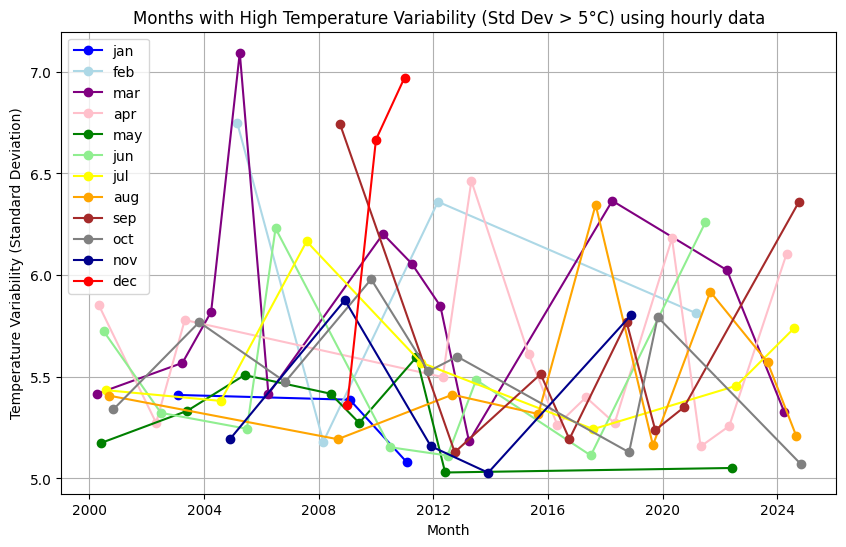

In [74]:
# Map months
def map_month(month):
    month_map = {
        1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
        7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
    }
    return month_map.get(month)
    

monthly_hourly['month'] = monthly_hourly.index.month.map(map_month)

# Filter for high variability in temperature across seasons
high_variability_monthly = monthly_hourly[monthly_hourly['temperature_2m_C']['std'] > 5]
print("Months with high temperature variability:")
print(len(high_variability_monthly))

colors = [
    'blue', 'lightblue', 'purple', 'pink', 'green', 'lightgreen',
    'yellow', 'orange', 'brown', 'grey', 'darkblue', 'red'
]



# Plot with colors representing each season
plt.figure(figsize=(10, 6))
for month, color in zip(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], colors):
    subset = high_variability_monthly[high_variability_monthly['month'] == month]
    plt.plot(subset.index, subset['temperature_2m_C']['std'], marker='o', linestyle='-', label=month, color=color)

plt.title('Months with High Temperature Variability (Std Dev > 5°C) using hourly data')
plt.xlabel('Month')
plt.ylabel('Temperature Variability (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()


In [156]:
yearly_hourly.index.year.unique()

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024],
      dtype='int32', name='date')

In [7]:
print(hourly_df.dtypes)
print(daily_df.dtypes)

index                                    int64
date                            datetime64[ns]
temperature_2m_C                       float64
relative_humidity_2m_percent           float64
precipitation_mm                       float64
weather_code                           float64
wind_speed_10m_kmh                     float64
wind_direction_10m_deg                 float64
wind_gusts_10m_kmh                     float64
dtype: object
index                                       int64
date                               datetime64[ns]
weather_code                              float64
temperature_2m_max_C                      float64
temperature_2m_min_C                      float64
temperature_2m_mean_C                     float64
precipitation_sum_mm                      float64
wind_speed_10m_max_kmh                    float64
wind_gusts_10m_max_kmh                    float64
wind_direction_10m_dominant_deg           float64
dtype: object


Let's make it more readable and more functional through class!

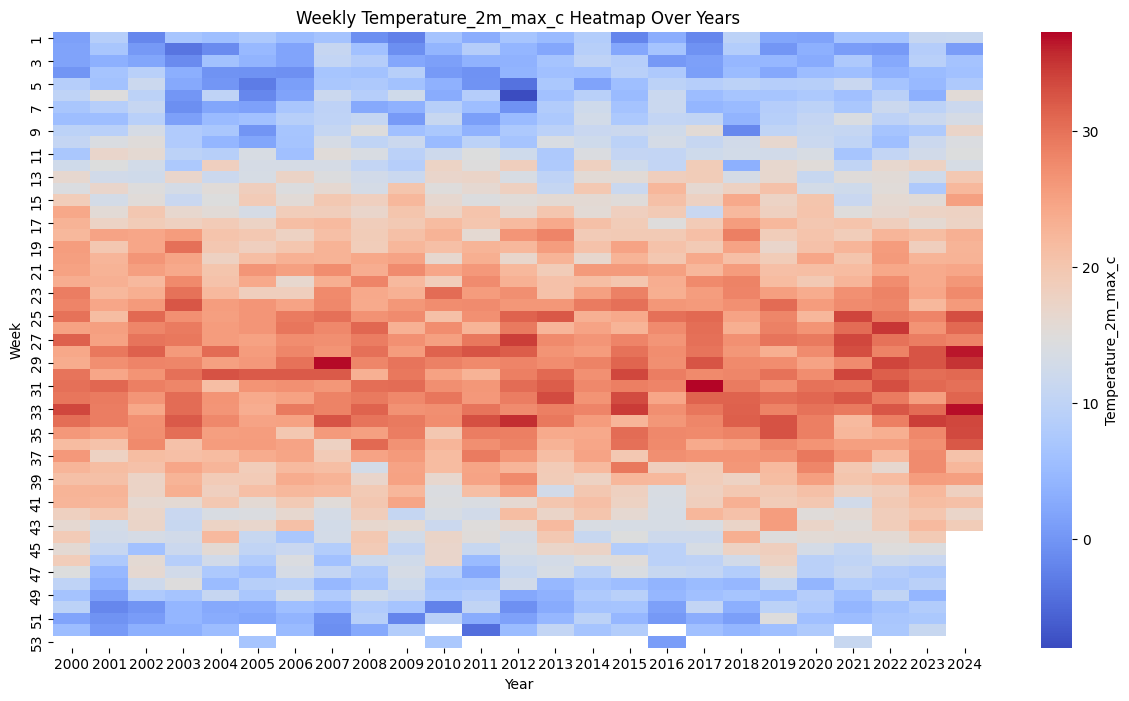

In [ ]:
# Importing libraries
import pandas as pd, sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Setting up the connection to the database        
conn = sqlite3.connect(r"/workspaces/weather-scraper-analyzer/data/weather_data.db")
hourly_df = pd.read_sql(r"SELECT * FROM hourly_data", conn)
daily_df = pd.read_sql(r"SELECT * FROM daily_data", conn)

# Dropping the index column.
hourly_df = hourly_df.drop(columns='index')
daily_df = daily_df.drop(columns='index')
# print(hourly_df.head(1))
# print(daily_df.head(1))

# Convert 'date' columns to datetime | This is because SQLite doesn't have a datetime datatype so it stores the data as object. So we have to convert it here for further use even
# even if in the fetch script we converted it to date
hourly_df['date'] = pd.to_datetime(hourly_df['date'])
daily_df['date'] = pd.to_datetime(daily_df['date']) 
# print(hourly_df.dtypes)
# print(daily_df.dtypes)

# Setting the date as index
hourly_df = hourly_df.set_index('date')
daily_df = daily_df.set_index('date')


class WeatherAnalyzer:
    # initializing the class and setting the variables 
    def __init__(self, hourly_data = hourly_df, daily_data = daily_df):
        self.hourly_data = hourly_data
        self.daily_data = daily_data
        # Setting the metrics
        self.hourly_metrics = {
            'temperature_2m_C': ['mean', 'max', 'min', 'std'],
            'relative_humidity_2m_percent': ['mean', 'max', 'min', 'std'],
            'precipitation_mm': ['mean', 'max', 'min', 'std'],
            'wind_speed_10m_kmh': ['mean', 'max', 'min', 'std'],
            'wind_direction_10m_deg': ['mean', 'max', 'min', 'std'],
            'wind_gusts_10m_kmh': ['mean', 'max', 'min', 'std']
        }
        self.daily_metrics = {
            'temperature_2m_max_C': ['mean', 'max', 'min', 'std'],
            'temperature_2m_min_C': ['mean', 'max', 'min', 'std'],
            'temperature_2m_mean_C': ['mean', 'max', 'min', 'std'],
            'precipitation_sum_mm': ['mean', 'max', 'min', 'std'],
            'wind_speed_10m_max_kmh': ['mean', 'max', 'min', 'std'],
            'wind_gusts_10m_max_kmh': ['mean', 'max', 'min', 'std'],
            'wind_direction_10m_dominant_deg': ['mean', 'max', 'min', 'std']
        }

        self.timeframe_mapping = {
            'week': 'W',
            'month': 'ME',
            'season': 'QE',
            'year': 'YE'
        }
        self.season_names = {
            1: 'Winter', 
            2: 'Spring', 
            3: 'Summer', 
            4: 'Autumn'}

    # aggregations hourly, daily (week, month, season, year)

    def aggregate_hourly(self, timeframe):
        # Map descriptive timeframe to the corresponding code
        resample_code = self.timeframe_mapping.get(timeframe, timeframe)  # fallback to original code if not mapped
        return self.hourly_data.resample(resample_code).agg(self.hourly_metrics)

    def aggregate_daily(self, timeframe):
        # Map descriptive timeframe to the corresponding code
        resample_code = self.timeframe_mapping.get(timeframe, timeframe)
        return self.daily_data.resample(resample_code).agg(self.daily_metrics)

    def display_aggregated_data(self):
        # Weekly aggregations
        weekly_hourly = self.aggregate_hourly('W')
        weekly_daily = self.aggregate_daily('W')
        
        # Monthly aggregations
        monthly_hourly = self.aggregate_hourly('ME')
        monthly_daily = self.aggregate_daily('ME')
        
        # Seasonal aggregations
        seasonal_hourly = self.aggregate_hourly('QE')
        seasonal_daily = self.aggregate_daily('QE')
        
        # Yearly aggregations
        yearly_hourly = self.aggregate_hourly('YE')
        yearly_daily = self.aggregate_daily('YE')
        
        return {
            'weekly_hourly': weekly_hourly, 
            'weekly_daily': weekly_daily,
            'monthly_hourly': monthly_hourly,
            'monthly_daily': monthly_daily,
            'seasonal_hourly': seasonal_hourly,
            'seasonal_daily': seasonal_daily,
            'yearly_hourly': yearly_hourly,
            'yearly_daily': yearly_daily
        }

    # calculate above/under variability to find variations (More extreme variations = extreme weather.) 
    def calculate_filter_variability(self, parameter, timeframe, threshold, variability_type):
        data = self.aggregate_hourly(timeframe) if timeframe in self.timeframe_mapping else None
        high_var = data[data[parameter]['std'] > threshold]
        low_var = data[data[parameter]['std'] < threshold]
        return high_var if variability_type == 'above' else low_var

    # generate month colors. 
    def generate_month_colors(self, data): 
        unique_months = data.index.month_name().unique()  # Get unique month names from the index
        color_list = sns.color_palette("hsv", 12)
        self.month_colors = dict(zip(unique_months, color_list)) # merge months and colors together in a dict

    
    # generate season colors
    def generate_season_colors(self, data):
        unique_seasons = data.index.quarter.unique()
        color_list = sns.color_palette("hsv", 4)
        self.season_colors = {self.season_names[season]: color for season, color in zip(unique_seasons, color_list)} # merge seasons and colors together in a dict
    
        
    # generate year_colors 
    def generate_year_colors(self, data):
        unique_years = data.index.year.unique()
        color_list = sns.color_palette("hsv", 30)
        self.year_colors = dict(zip(unique_years, color_list)) # merge years and colors together


    # plot variability
    def plot_variability(self, parameter, timeframe, threshold, variability_type):
        high_variability_data = self.calculate_filter_variability(parameter, timeframe, threshold, variability_type='above')
        low_variability_data = self.calculate_filter_variability(parameter, timeframe, threshold, variability_type='under')
        
        if timeframe == 'week': # WEEK DATA
            
            if variability_type == 'above':
                plt.figure(figsize=(15, 6))
                plt.scatter(high_variability_data.index, high_variability_data[parameter]['std'], marker='o', label=f"{parameter} Std.dev")
                plt.title(f'Higher Variability in {parameter} (Timeframe: {timeframe} | Std.dev > {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend()
                plt.grid(True)
                plt.show()
            elif variability_type == 'under':
                plt.figure(figsize=(15, 6))
                plt.scatter(low_variability_data.index, low_variability_data[parameter]['std'], marker='o', label=f"{parameter} Std.dev")
                plt.title(f'Lower Variability in {parameter} (Timeframe: {timeframe} | Std.dev < {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend()
                plt.grid(True)
                plt.show()
        
        elif timeframe == 'month': # MONTH DATA
         
            self.generate_month_colors(self.hourly_data) # set colors for unique months.

            if variability_type == 'above':

                high_variability_data['month'] = high_variability_data.index.month_name()  # Map index to month names

                plt.figure(figsize=(15, 6))
                # for loop to plot the month & colors
                for month, color in self.month_colors.items():
                    subset = high_variability_data[high_variability_data['month'] == month]
                    plt.scatter(subset.index, subset[parameter]['std'], marker='o', label=f"{month}", color = color, zorder = 3)
                plt.title(f'Higher Variability in {parameter} (Timeframe: {timeframe} | Std.dev > {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Months")
                plt.gca().set_facecolor('#6e6969')  # Set the background to a gray color
                plt.grid(True)
                plt.show()

            elif variability_type == 'under':

                low_variability_data['month'] = low_variability_data.index.month_name()  # Map index to month names

                plt.figure(figsize=(15, 6))
                # for loop to plot the month & colors
                for month, color in self.month_colors.items():
                    subset = low_variability_data[low_variability_data['month'] == month]
                    plt.scatter(subset.index, subset[parameter]['std'], marker='o', label=f"{month}", color = color, zorder = 3)
                plt.title(f'Lower Variability in {parameter} (Timeframe: {timeframe} | Std.dev < {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Months")
                plt.gca().set_facecolor('#6e6969')  # Set the background to a gray color
                plt.grid(True)
                plt.show()

        elif timeframe == 'season': # SEASON DATA
            self.generate_season_colors(self.hourly_data) # set colors for unique seasons
            

            if variability_type == 'above':
                high_variability_data['season'] = high_variability_data.index.quarter.map(self.season_names)  # Map index to seasons

                plt.figure(figsize=(15, 6))
                # for loop to plot the seasons & colors
                for season, color in self.season_colors.items():
                    subset = high_variability_data[high_variability_data['season'] == season]
                    plt.scatter(subset.index, subset[parameter]['std'], marker='o', label=f"{season}", color = color, zorder = 3)
                plt.title(f'{variability_type.capitalize()} variability in {parameter} (Timeframe: {timeframe} | Std.dev > {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Seasons")
                plt.gca().set_facecolor('#6e6969')  # Set the background to a gray color
                plt.grid(True)
                plt.show()

            elif variability_type == 'under':
                low_variability_data['season'] = low_variability_data.index.quarter.map(self.season_names) # map index to seasons

                plt.figure(figsize=(15, 6))
                # for loop to plot the seasons and colors
                for season, color in self.season_colors.items():
                    subset = low_variability_data[low_variability_data['season'] == season]
                    plt.scatter(subset.index, subset[parameter]['std'], marker = 'o', label = {season}, color = color, zorder = 3)
                plt.title(f'{variability_type.capitalize()} variability in {parameter} (Timeframe: {timeframe} | Std.dev < {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Seasons")
                plt.gca().set_facecolor('#6e6969')  # Set the background to a gray color
                plt.grid(True)
                plt.show()
        
        else: # YEAR DATA
            self.generate_year_colors(self.hourly_data) # set colors for unique years.

            if variability_type == 'above':
                high_variability_data['year'] = high_variability_data.index.year  # Map index to years
                plt.figure(figsize=(15, 6))
                # for loop to plot the years & colors
                for year, color in self.year_colors.items():
                    subset = high_variability_data[high_variability_data['year'] == year]
                    plt.scatter(subset.index, subset[parameter]['std'], marker='o', label=f"{year}", color = color, zorder = 3)  

                plt.title(f'Higher Variability in {parameter} (Timeframe: {timeframe} | Std.dev > {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Years")
                plt.gca().set_facecolor('#6e6969')  # Set the background to a dark gray color
                plt.grid(True, color='#444444')  # Set grid lines to a lighter shade for contrast
                plt.tight_layout()
                plt.show()

            elif variability_type == 'under':
                low_variability_data['year'] = low_variability_data.index.year  # Map index to years 
                plt.figure(figsize=(15, 6))
                # for loop to plot the years & colors
                for year, color in self.year_colors.items():
                    subset = low_variability_data[low_variability_data['year'] == year]
                    plt.scatter(subset.index, subset[parameter]['std'], marker='o', label=f"{year}", color = color, zorder = 3)  
                plt.title(f'Lower Variability in {parameter} (Timeframe: {timeframe} | Std.dev < {threshold})')
                plt.xlabel('Time')
                plt.ylabel(f'{parameter} Standard Deviation')
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Years")
                plt.gca().set_facecolor('#6e6969')  # Set the background to a gray color
                plt.grid(True, color='#444444')  # Set grid lines to a lighter shade for contrast
                plt.tight_layout()
                plt.show()
            

    # plotting yearly trends using daily data
    def plot_trend(self, parameter, timeframe):
        weekly_data = self.aggregate_daily('week')
        monthly_data = self.aggregate_daily('month')
        seasonal_data = self.aggregate_daily('season')
        yearly_data = self.aggregate_daily('year')

        if timeframe == 'week':  # Weekly trend as a heatmap
            # Filter to get only 'mean' for the specified parameter
            weekly_data = weekly_data[(parameter, 'mean')].reset_index()
            
            # Rename columns for easy access
            weekly_data.columns = ['date', 'value']
            weekly_data['year'] = weekly_data['date'].dt.year
            weekly_data['week'] = weekly_data['date'].dt.isocalendar().week  # Get ISO week number

            # Aggregate by year and week to ensure unique values for each combination
            weekly_data = weekly_data.groupby(['year', 'week'])['value'].mean().reset_index()

            # Pivot table for the heatmap
            heatmap_data = weekly_data.pivot(index='week', columns='year', values='value')

            # Plotting the heatmap
            plt.figure(figsize=(15, 8))
            sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, fmt=".1f", cbar_kws={'label': f'{parameter.capitalize()}'})
            plt.title(f"Weekly {parameter.capitalize()} Heatmap Over Years")
            plt.xlabel("Year")
            plt.ylabel("Week")
            plt.show()

        elif timeframe == 'month':  # Monthly trend as a heatmap
            # Filter to get only 'mean' for the specified parameter
            monthly_data = monthly_data[(parameter, 'mean')].reset_index()
            
            monthly_data.columns = ['date', 'value']  # Rename columns for easy access
            monthly_data['year'] = monthly_data['date'].dt.year
            monthly_data['month'] = monthly_data['date'].dt.month_name()

            # Pivot table for the heatmap
            heatmap_data = monthly_data.pivot(index='month', columns='year', values='value')

            # Sort the months to ensure the heatmap shows January through December in order
            month_order = ["January", "February", "March", "April", "May", "June", 
                        "July", "August", "September", "October", "November", "December"]
            heatmap_data = heatmap_data.reindex(month_order)

            # Plotting the heatmap
            plt.figure(figsize=(15, 8))
            sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': f'{parameter.capitalize()}'})
            plt.title(f"Monthly {parameter.capitalize()} Heatmap Over Years")
            plt.xlabel("Year")
            plt.ylabel("Month")
            plt.show()

        elif timeframe == 'season':  # Seasonal trend plot
            seasonal_data['year'] = seasonal_data.index.year
            seasonal_data['season'] = seasonal_data.index.quarter.map(self.season_names)
            
            plt.figure(figsize=(15, 6))
            for season in seasonal_data['season'].unique():
                subset = seasonal_data[seasonal_data['season'] == season]
                plt.plot(subset['year'], subset[parameter]['mean'], marker='o', label=season)
            plt.title(f'Seasonal Average {parameter.capitalize()} Trends')
            plt.xlabel('Year')
            plt.ylabel(f'{parameter.capitalize()} (°C)')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Seasons")
            plt.show()

        else:  # Yearly trend plot
            yearly_data['year'] = yearly_data.index.year  # Map index to years

            plt.figure(figsize=(15, 6))
            # Plot all years at once
            plt.plot(yearly_data.index, yearly_data[parameter]['mean'], linestyle='-', marker = 'o', color='green', label=f'Yearly Average {parameter}')
            
            plt.title(f'Yearly {parameter.capitalize()} Trends')
            plt.xlabel('Year')
            plt.ylabel(f'{parameter.capitalize()} (°C)')
            plt.legend(loc='upper left', title="Trend")
            plt.show()
                        

# Usage
# analyzer = WeatherAnalyzer()

# ## ***PLOTTING TRENDING***

# max_temp_week_trend = analyzer.plot_trend('temperature_2m_max_C', 'week')
# max_temp_month_trend = analyzer.plot_trend('temperature_2m_max_C', 'month')
# max_temp_season_trend = analyzer.plot_trend('temperature_2m_max_C', 'season')
# max_temp_year_trend = analyzer.plot_trend('temperature_2m_max_C', 'year')
# min_temp_week_trend = analyzer.plot_trend('temperature_2m_min_C', 'week')
# min_temp_month_trend = analyzer.plot_trend('temperature_2m_min_C', 'month')
# min_temp_season_trend = analyzer.plot_trend('temperature_2m_min_C', 'season')
# min_temp_year_trend = analyzer.plot_trend('temperature_2m_min_C', 'year')
# mean_temp_week_trend = analyzer.plot_trend('temperature_2m_mean_C', 'week')
# mean_temp_month_trend = analyzer.plot_trend('temperature_2m_mean_C', 'month')
# mean_temp_season_trend = analyzer.plot_trend('temperature_2m_mean_C', 'season')
# mean_temp_year_trend = analyzer.plot_trend('temperature_2m_mean_C', 'year')


# precipitation_week_trend = analyzer.plot_trend('precipitation_sum_mm', 'week')
# precipitation_month_trend = analyzer.plot_trend('precipitation_sum_mm', 'month')
# precipitation_season_trend = analyzer.plot_trend('precipitation_sum_mm', 'season')
# precipitation_year_trend = analyzer.plot_trend('precipitation_sum_mm', 'year')
# windspeed_week_trend = analyzer.plot_trend('wind_speed_10m_max_kmh', 'week')
# windspeed_month_trend = analyzer.plot_trend('wind_speed_10m_max_kmh', 'month')
# windspeed_season_trend = analyzer.plot_trend('wind_speed_10m_max_kmh', 'season')
# windspeed_year_trend = analyzer.plot_trend('wind_speed_10m_max_kmh', 'year')
# windgust_week_trend = analyzer.plot_trend('wind_gusts_10m_max_kmh', 'week')
# windgust_month_trend = analyzer.plot_trend('wind_gusts_10m_max_kmh', 'month')
# windgust_season_trend = analyzer.plot_trend('wind_gusts_10m_max_kmh', 'season')
# windgust_year_trend = analyzer.plot_trend('wind_gusts_10m_max_kmh', 'year')


# ## ***PLOTTING VARIABILITY***

# # TEMPERATURE
# temp_high_variability_week = analyzer.plot_variability('temperature_2m_C', 'week', 5, 'above')
# temp_low_variability_week = analyzer.plot_variability('temperature_2m_C', 'week', 5, 'under')
# temp_high_variability_month = analyzer.plot_variability('temperature_2m_C', 'month', 5, 'above')
# temp_low_variability_month = analyzer.plot_variability('temperature_2m_C', 'month', 5, 'under')
# temp_high_variability_season = analyzer.plot_variability('temperature_2m_C', 'season', 5, 'above')
# temp_low_variability_season = analyzer.plot_variability('temperature_2m_C', 'season', 5, 'under')
# temp_high_variability_year = analyzer.plot_variability('temperature_2m_C', 'year', 5, 'above')
# temp_low_variability_year = analyzer.plot_variability('temperature_2m_C', 'year', 5, 'under')

# # RELATIVE HUMIDITY
# rel_humidity_high_variability_week = analyzer.plot_variability('relative_humidity_2m_percent', 'week', 5, 'above')
# rel_humidity_low_variability_week = analyzer.plot_variability('relative_humidity_2m_percent', 'week', 5, 'under')
# rel_humidity_high_variability_month = analyzer.plot_variability('relative_humidity_2m_percent', 'month', 5, 'above')
# rel_humidity_low_variability_month = analyzer.plot_variability('relative_humidity_2m_percent', 'month', 5, 'under')
# rel_humidity_high_variability_season = analyzer.plot_variability('relative_humidity_2m_percent', 'season', 5, 'above')
# rel_humidity_low_variability_season = analyzer.plot_variability('relative_humidity_2m_percent', 'season', 5, 'under')
# rel_humidity_high_variability_year = analyzer.plot_variability('relative_humidity_2m_percent', 'year', 5, 'above')
# rel_humidity_low_variability_year = analyzer.plot_variability('relative_humidity_2m_percent', 'year', 5, 'under')

# # PRECIPITATION
# precipitation_high_variability_week = analyzer.plot_variability('precipitation_mm', 'week', 5, 'above')
# precipitation_low_variability_week = analyzer.plot_variability('precipitation_mm', 'week', 5, 'under')
# precipitation_high_variability_month = analyzer.plot_variability('precipitation_mm', 'month', 5, 'above')
# precipitation_low_variability_month = analyzer.plot_variability('precipitation_mm', 'month', 5, 'under')
# precipitation_high_variability_season = analyzer.plot_variability('precipitation_mm', 'season', 5, 'above')
# precipitation_low_variability_season = analyzer.plot_variability('precipitation_mm', 'season', 5, 'under')
# precipitation_high_variability_year = analyzer.plot_variability('precipitation_mm', 'year', 5, 'above')
# precipitation_low_variability_year = analyzer.plot_variability('precipitation_mm', 'year', 5, 'under')

# # WIND SPEED
# windspeed_high_variability_week = analyzer.plot_variability('wind_speed_10m_kmh', 'week', 5, 'above')
# windspeed_low_variability_week = analyzer.plot_variability('wind_speed_10m_kmh', 'week', 5, 'under')
# windspeed_high_variability_month = analyzer.plot_variability('wind_speed_10m_kmh', 'month', 5, 'above')
# windspeed_low_variability_month = analyzer.plot_variability('wind_speed_10m_kmh', 'month', 5, 'under')
# windspeed_high_variability_season = analyzer.plot_variability('wind_speed_10m_kmh', 'season', 5, 'above')
# windspeed_low_variability_season = analyzer.plot_variability('wind_speed_10m_kmh', 'season', 5, 'under')
# windspeed_high_variability_year = analyzer.plot_variability('wind_speed_10m_kmh', 'year', 5, 'above')
# windspeed_low_variability_year = analyzer.plot_variability('wind_speed_10m_kmh', 'year', 5, 'under')

# # WIND GUSTS
# windgust_high_variability_week = analyzer.plot_variability('wind_gusts_10m_kmh', 'week', 5, 'above')
# windgust_low_variability_week = analyzer.plot_variability('wind_gusts_10m_kmh', 'week', 5, 'under')
# windgust_high_variability_month = analyzer.plot_variability('wind_gusts_10m_kmh', 'month', 5, 'above')
# windgust_low_variability_month = analyzer.plot_variability('wind_gusts_10m_kmh', 'month', 5, 'under')
# windgust_high_variability_season = analyzer.plot_variability('wind_gusts_10m_kmh', 'season', 5, 'above')
# windgust_low_variability_season = analyzer.plot_variability('wind_gusts_10m_kmh', 'season', 5, 'under')
# windgust_high_variability_year = analyzer.plot_variability('wind_gusts_10m_kmh', 'year', 5, 'above')
# windgust_low_variability_year = analyzer.plot_variability('wind_gusts_10m_kmh', 'year', 5, 'under')



**Task 2 Identify Extreme Weather Events:**


- Use the data to detect extreme weather events (e.g., very high temperatures, storms).

- Calculate the frequency of such events over the dataset’s timeline.

In [ ]:
# through inheritance (powerful characteristic of classes in python (OOP language) we can inherit the parent class and create a child class)
# it will inherit functions(methods) like aggregate_daily / aggregate_hourly, or other variables!!!

class ExtremeWeatherAnalyzer(WeatherAnalyzer):
    def __init__(self, hourly_data, daily_data):
        # calling the constructor of the parent class
        super().__init__(hourly_data, daily_data)
    
    # Set fixed or percentile-based thresholds
    def define_thresholds(self):
        self.temperature_high = self.daily_data['temperature_2m_max_C'].quantile(0.95)
        self.temperature_low = self.daily_data['temperature_2m_min_C'].quantile(0.05)
        self.precipitation_high = self.daily_data['precipitation_sum_mm'].quantile(0.95)
        self.wind_speed_high = self.daily_data['wind_speed_10m_max_kmh'].quantile(0.95)

    def flag_extreme_events(self):
        # Flag extreme high and low temperatures
        self.daily_data['extreme_high_temp'] = self.daily_data['temperature_2m_max_C'] > self.temperature_high
        self.daily_data['extreme_low_temp'] = self.daily_data['temperature_2m_min_C'] < self.temperature_low
        
        # Flag heavy precipitation days
        self.daily_data['extreme_precipitation'] = self.daily_data['precipitation_sum_mm'] > self.precipitation_high
        
        # Flag high wind speed days
        self.daily_data['extreme_wind_speed'] = self.daily_data['wind_speed_10m_max_kmh'] > self.wind_speed_high
        
        # Flag extreme weather based on weather code
        self.daily_data['extreme_weather_code'] = self.daily_data['weather_code'] >= 75

    def calculate_frequency(self):
        # Calculate the frequency of extreme events by year
        extreme_events = self.daily_data.groupby(self.daily_data.index.year)[[
            'extreme_high_temp', 'extreme_low_temp', 'extreme_precipitation', 
            'extreme_wind_speed', 'extreme_weather_code']].sum()
        
        return extreme_events

    def plot_extreme_events(self, extreme_events):
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(12, 8))
        
        extreme_events['extreme_high_temp'].plot(label='Extreme High Temp', marker='o', color='red')
        extreme_events['extreme_low_temp'].plot(label='Extreme Low Temp', marker='o', color='blue')
        extreme_events['extreme_precipitation'].plot(label='Heavy Precipitation', marker='o', color='green')
        extreme_events['extreme_wind_speed'].plot(label='High Wind Speed', marker='o', color='purple')
        # extreme_events['extreme_weather_code'].plot(label='Extreme Weather Code', marker='o', color='orange')
        
        plt.title('Frequency of Extreme Weather Events Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Extreme Events')
        plt.legend()
        plt.grid(True)
        plt.show()    

# USAGE
extreme_weather_analyzer = ExtremeWeatherAnalyzer(hourly_df, daily_df)

# extreme_weather_analyzer.define_thresholds()
# extreme_weather_analyzer.flag_extreme_events()
# extreme_events = extreme_weather_analyzer.calculate_frequency()
# extreme_weather_analyzer.plot_extreme_events(extreme_events)
